___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [240]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, BatchNormalization, Input, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, recall_score, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils import class_weight

from transformers import AutoTokenizer
from transformers import TFAutoModel
from official.nlp import optimization


plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', None)

In [3]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [4]:
SEED = 42
tf.keras.utils.set_random_seed(SEED)

In [5]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\white\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\white\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\white\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [7]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [8]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


### Data Wrangling

<Axes: xlabel='Rating', ylabel='Count'>

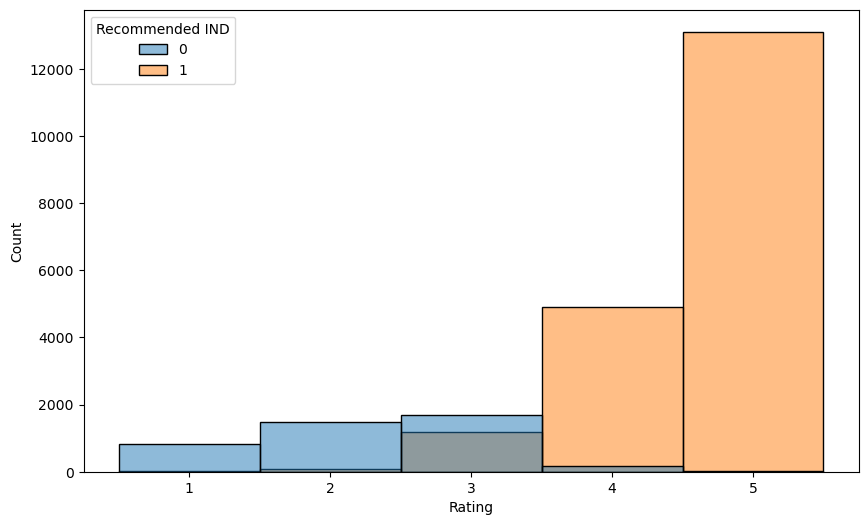

In [11]:
sns.histplot(df, x="Rating", hue="Recommended IND", discrete=True)

In [12]:
df["Recommended IND"].unique()

array([1, 0], dtype=int64)

In [13]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [14]:
len(df[(df["Rating"] == 2) & (df["Recommended IND"] == 1)])

94

In [15]:
len(df[(df["Rating"] == 4) & (df["Recommended IND"] == 0)])

168

In [16]:
len(df[(df["Rating"] == 5) & (df["Recommended IND"] == 0)])

25

In [17]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

<Axes: xlabel='Rating', ylabel='Count'>

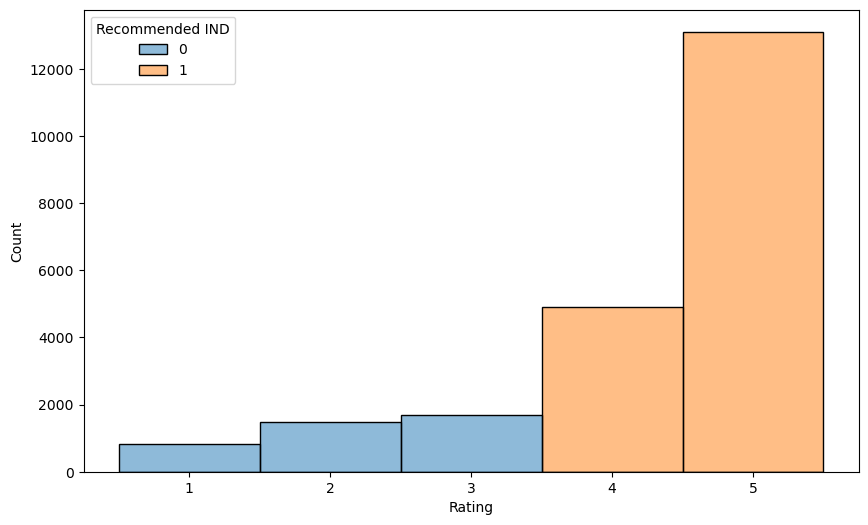

In [18]:
sns.histplot(df, x="Rating", hue="Recommended IND", discrete=True)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

<Axes: xlabel='Recommended IND', ylabel='count'>

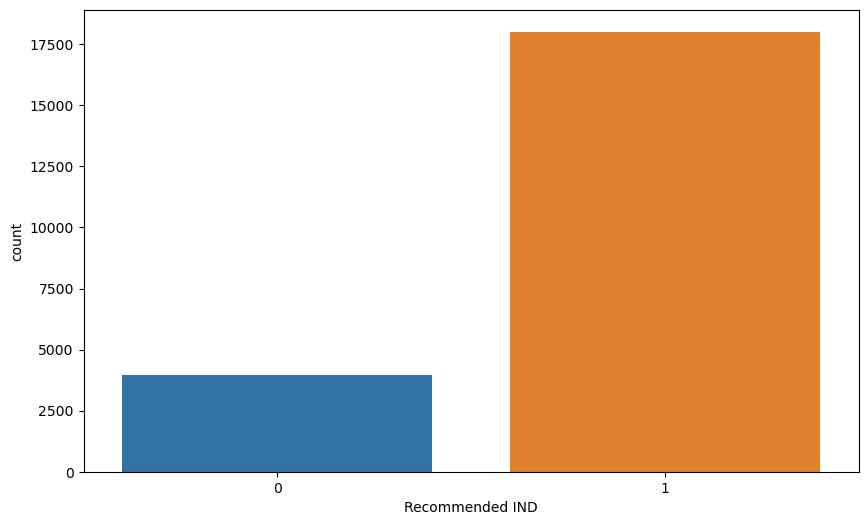

In [19]:
sns.countplot(x="Recommended IND",data=df)

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [20]:
df.rename(columns={"Review Text":"Text", "Recommended IND":"Recommended"}, inplace=True)

In [21]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                                Text  Rating  Recommended  \
0  Absolutely wonderful - silky and sexy and comf...       4            1   
1  Love this dress!  it's sooo pretty.  i happene...       5            1   
2  I had such high hopes for this dress and reall...       3            0   
3  I love, love, love this jumpsuit. it's fun, fl...       5            1   
4  This shirt is very flattering to all due to th...       5            1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [22]:
df2 = df[['Text','Recommended']]
df2.head()

Text  Recommended
0  Absolutely wonderful - silky and sexy and comf...            1
1  Love this dress!  it's sooo pretty.  i happene...            1
2  I had such high hopes for this dress and reall...            0
3  I love, love, love this jumpsuit. it's fun, fl...            1
4  This shirt is very flattering to all due to th...            1

---
---


### Missing Value Detection

In [23]:
df2.isna().sum()

Text           819
Recommended      0
dtype: int64

In [24]:
df2.dropna(inplace = True)

In [25]:
df2.reset_index(drop=True,
               inplace=True)
df2

Text  Recommended
0      Absolutely wonderful - silky and sexy and comf...            1
1      Love this dress!  it's sooo pretty.  i happene...            1
2      I had such high hopes for this dress and reall...            0
3      I love, love, love this jumpsuit. it's fun, fl...            1
4      This shirt is very flattering to all due to th...            1
...                                                  ...          ...
21170  I was surprised at the positive reviews for th...            0
21171  So i wasn't sure about ordering this skirt bec...            1
21172  I was very happy to snag this dress at such a ...            1
21173  This fit well, but the top was very see throug...            0
21174  This dress in a lovely platinum is feminine an...            1

[21175 rows x 2 columns]

<Axes: xlabel='Recommended', ylabel='count'>

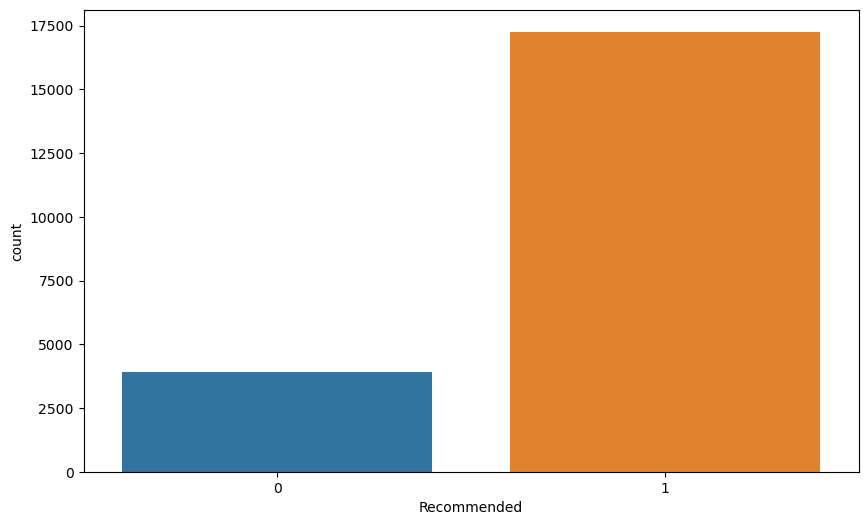

In [26]:
sns.countplot(x="Recommended",data=df2)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [27]:
stop_words = stopwords.words('english')

In [28]:
for i in ["not", "no"]:
        stop_words.remove(i)

In [29]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [30]:
pos = df2[df2["Recommended"] == 1]["Text"]

In [31]:
pos = pos.apply(cleaning)

In [32]:
neg = df2[df2["Recommended"] == 0]["Text"]

In [33]:
neg = neg.apply(cleaning)

### Collect Words (positive and negative separately)

In [34]:
pos_word = " ".join(pos)

In [35]:
pos_word[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [36]:
neg_word = " ".join(neg)

In [37]:
neg_word[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [38]:
worldcloud_pos = WordCloud(background_color="white", max_words =250)

In [39]:
worldcloud_pos.generate(pos_word)

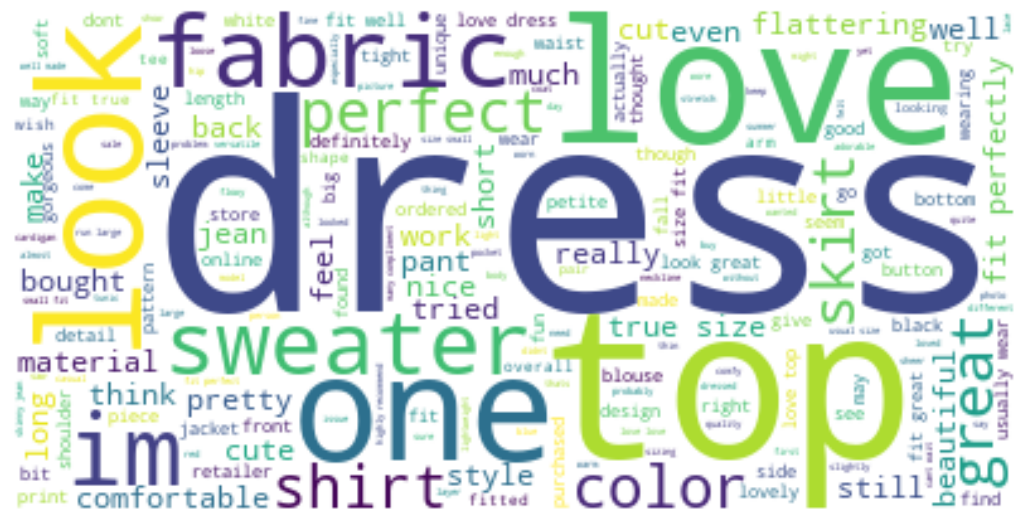

In [40]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
worldcloud_neg = WordCloud(background_color="black", max_words =250)

In [42]:
worldcloud_neg.generate(neg_word)

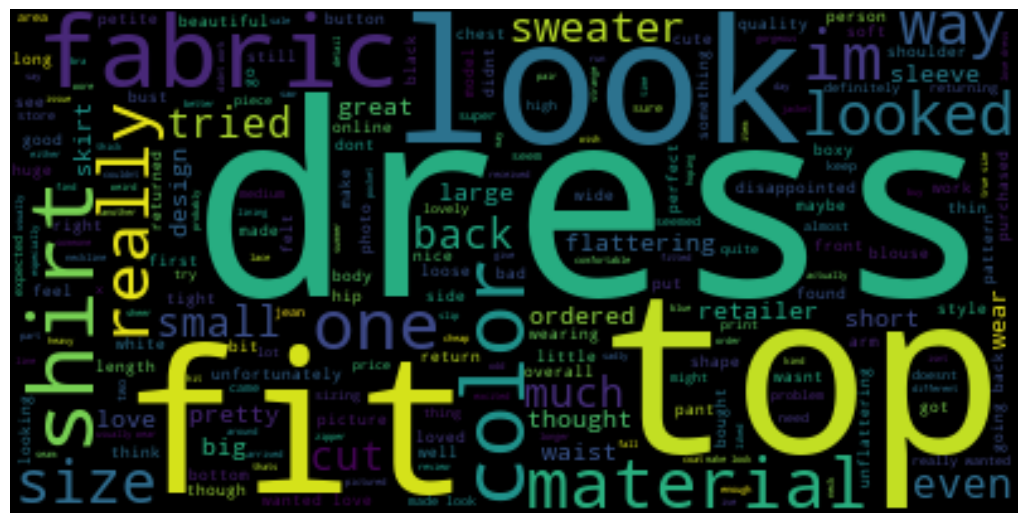

In [43]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [44]:
X = df2["Text"].values

In [45]:
y = df2["Recommended"].map({0:1, 1:0}).values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=SEED)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [47]:
count_vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.90)

In [48]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [49]:
pd.DataFrame(X_train_count.toarray(), columns = count_vectorizer.get_feature_names_out())

aa  ab  abdomen  ability  able  absolute  absolutely  absolutley  \
0       0   0        0        0     0         0           0           0   
1       0   0        0        0     1         0           0           0   
2       0   0        0        0     0         0           0           0   
3       0   0        0        0     0         0           0           0   
4       0   0        0        0     0         0           0           0   
...    ..  ..      ...      ...   ...       ...         ...         ...   
19052   0   0        0        0     0         0           0           0   
19053   0   0        0        0     0         0           0           0   
19054   0   0        0        0     0         0           0           0   
19055   0   0        0        0     0         0           0           0   
19056   0   0        0        0     0         0           0           0   

       abstract  absurd  abt  abundance  ac  accent  accented  accentuate  \
0             0       0    0          0   0       0         0           0   
1             0       0    0          0   0       0         0           0   
2             0       0    0          0   0       0         0           0   
3             0       0    0          0   0       0         0           0   
4             0       0    0          0   0       0         0           0   
...         ...     ...  ...        ...  ..     ...       ...         ...   
19052         0       0    0          0   0       0         0           0   
19053         0       0    0          0   0       0         0           0   
19054         0       0    0          0   0       0         0           0   
19055         0       0    0          0   0       0         0           0   
19056         0       0    0          0   0       0         0           0   

       accentuated  accentuates  accentuating  accept  acceptable  access  \
0                0            0             0       0           0       0   
1                0            0             0       0           0       0   
2                0            0             0       0           0       0   
3                0            0             0       0           0       0   
4                0            0             0       0           0       0   
...            ...          ...           ...     ...         ...     ...   
19052            0            0             0       0           0       0   
19053            0            0             0       0           0       0   
19054            0            0             0       0           0       0   
19055            0            0             0       0           0       0   
19056            0            0             0       0           0       0   

       accessorize  accessorized  accessorizing  accessory  accident  \
0                0             0              0          0         0   
1                0             0              0          0         0   
2                0             0              0          0         0   
3                0             0              0          0         0   
4                0             0              0          0         0   
...            ...           ...            ...        ...       ...   
19052            0             0              0          0         0   
19053            0             0              0          0         0   
19054            0             0              0          0         0   
19055            0             0              0          0         0   
19056            0             0              0          0         0   

       accidental  accidentally  accommodate  accommodates  according  \
0               0             0            0             0          0   
1               0             0            0             0          0   
2               0             0            0             0          0   
3               0             0            0             0          0   
4               0         

### TF-IDF

In [50]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.90)

In [51]:
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [52]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aa   ab  abdomen  ability      able  absolute  absolutely  absolutley  \
0      0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
1      0.0  0.0      0.0      0.0  0.313219       0.0         0.0         0.0   
2      0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
3      0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
4      0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
...    ...  ...      ...      ...       ...       ...         ...         ...   
19052  0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
19053  0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
19054  0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
19055  0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   
19056  0.0  0.0      0.0      0.0  0.000000       0.0         0.0         0.0   

       abstract  absurd  abt  abundance   ac  accent  accented  accentuate  \
0           0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
1           0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
2           0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
3           0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
4           0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
...         ...     ...  ...        ...  ...     ...       ...         ...   
19052       0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
19053       0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
19054       0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
19055       0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   
19056       0.0     0.0  0.0        0.0  0.0     0.0       0.0         0.0   

       accentuated  accentuates  accentuating  accept  acceptable  access  \
0              0.0          0.0           0.0     0.0         0.0     0.0   
1              0.0          0.0           0.0     0.0         0.0     0.0   
2              0.0          0.0           0.0     0.0         0.0     0.0   
3              0.0          0.0           0.0     0.0         0.0     0.0   
4              0.0          0.0           0.0     0.0         0.0     0.0   
...            ...          ...           ...     ...         ...     ...   
19052          0.0          0.0           0.0     0.0         0.0     0.0   
19053          0.0          0.0           0.0     0.0         0.0     0.0   
19054          0.0          0.0           0.0     0.0         0.0     0.0   
19055          0.0          0.0           0.0     0.0         0.0     0.0   
19056          0.0          0.0           0.0     0.0         0.0     0.0   

       accessorize  accessorized  accessorizing  accessory  accident  \
0              0.0           0.0            0.0        0.0       0.0   
1              0.0           0.0            0.0        0.0       0.0   
2              0.0           0.0            0.0        0.0       0.0   
3              0.0           0.0            0.0        0.0       0.0   
4              0.0           0.0            0.0        0.0       0.0   
...            ...           ...            ...        ...       ...   
19052          0.0           0.0            0.0        0.0       0.0   
19053          0.0           0.0            0.0        0.0       0.0   
19054          0.0           0.0            0.0        0.0       0.0   
19055          0.0           0.0            0.0        0.0       0.0   
19056          0.0           0.0            0.0        0.0       0.0   

       accidental  accidentally  accommodate  accommodates  according  \
0             0.0           0.0          0.0           0.0        0.0   
1             0.0           0.0          0.0           0.0        0.0   
2             0.0           0.0          0.0           0.0        0.0   
3             0.

### Eval Function

In [53]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [54]:
log = LogisticRegression(C=0.01, max_iter=1000, class_weight= "balanced", random_state=SEED)

In [55]:
log.fit(X_train_count, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [56]:
eval(log, X_train_count, X_test_count)

[[1502  225]
 [  45  346]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.61      0.88      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.88      0.82      2118
weighted avg       0.90      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15534
           1       0.63      0.90      0.74      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.89      0.83     19057
weighted avg       0.91      0.88      0.89     19057



In [57]:
scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [58]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872067
train_accuracy     0.883332
test_f1            0.714598
train_f1           0.740584
test_recall        0.866301
train_recall       0.900811
test_precision     0.608288
train_precision    0.628753
dtype: float64

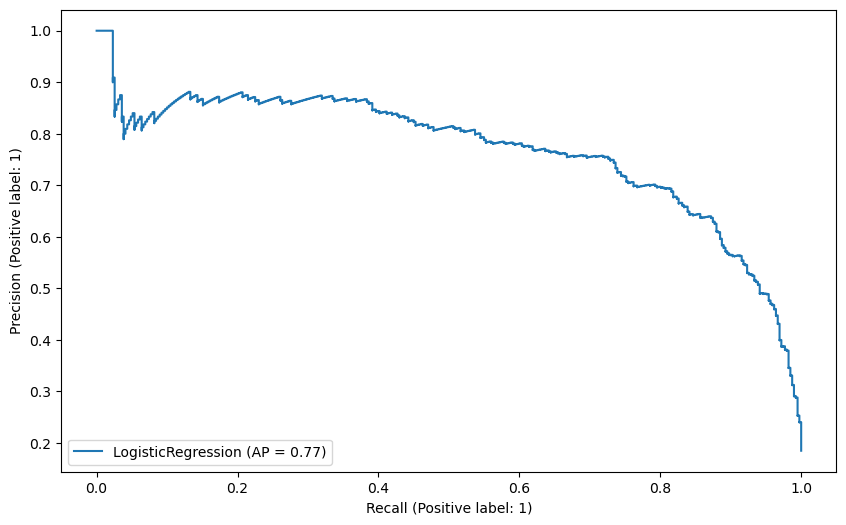

In [59]:
PrecisionRecallDisplay.from_estimator(log, X_test_count, y_test)

In [60]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [61]:
log = LogisticRegression(C=0.01, max_iter=1000, class_weight= "balanced", random_state=SEED)

In [62]:
log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [63]:
eval(log, X_train_count, X_test_count)

[[1462  265]
 [  64  327]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1727
           1       0.55      0.84      0.67       391

    accuracy                           0.84      2118
   macro avg       0.76      0.84      0.78      2118
weighted avg       0.88      0.84      0.86      2118

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     15534
           1       0.56      0.82      0.66      3523

    accuracy                           0.85     19057
   macro avg       0.76      0.84      0.78     19057
weighted avg       0.88      0.85      0.86     19057



In [64]:
scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [65]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.849347
train_accuracy     0.853970
test_f1            0.681495
train_f1           0.691667
test_recall        0.871703
train_recall       0.885987
test_precision     0.559612
train_precision    0.567255
dtype: float64

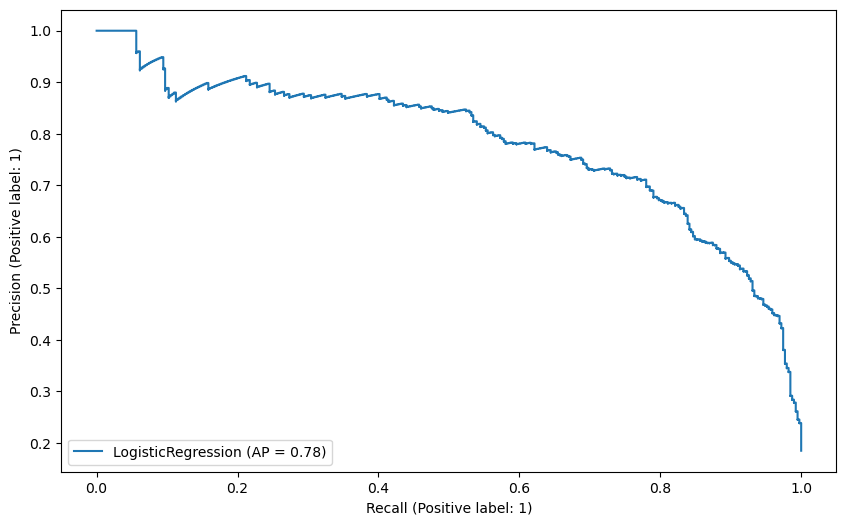

In [66]:
PrecisionRecallDisplay.from_estimator(log, X_test_tf_idf, y_test)

In [67]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [68]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_count,y_train)

BernoulliNB(alpha=1)

In [69]:
eval(nb, X_train_count, X_test_count)

[[1586  141]
 [  84  307]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1727
           1       0.69      0.79      0.73       391

    accuracy                           0.89      2118
   macro avg       0.82      0.85      0.83      2118
weighted avg       0.90      0.89      0.90      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.75      0.83      0.78      3523

    accuracy                           0.92     19057
   macro avg       0.85      0.88      0.87     19057
weighted avg       0.92      0.92      0.92     19057



In [70]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [71]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.899669
train_accuracy     0.916642
test_f1            0.741082
train_f1           0.785016
test_recall        0.776881
train_recall       0.823257
test_precision     0.708785
train_precision    0.750177
dtype: float64

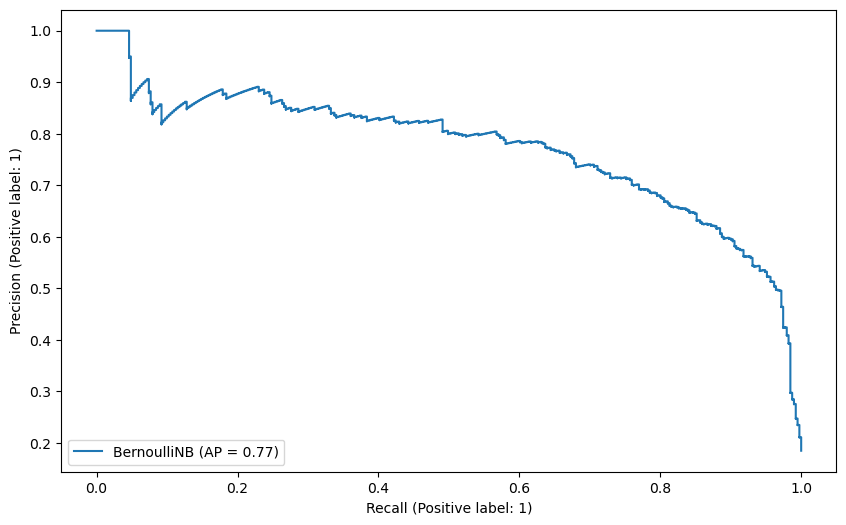

In [72]:
PrecisionRecallDisplay.from_estimator(nb, X_test_count, y_test)

In [73]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [74]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [75]:
eval(nb, X_train_tf_idf, X_test_tf_idf)

[[1585  142]
 [  80  311]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1727
           1       0.69      0.80      0.74       391

    accuracy                           0.90      2118
   macro avg       0.82      0.86      0.84      2118
weighted avg       0.90      0.90      0.90      2118

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15534
           1       0.75      0.84      0.79      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.89      0.87     19057
weighted avg       0.92      0.92      0.92     19057



In [76]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [77]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.902030
train_accuracy     0.919709
test_f1            0.748669
train_f1           0.794295
test_recall        0.789372
train_recall       0.838521
test_precision     0.712275
train_precision    0.754507
dtype: float64

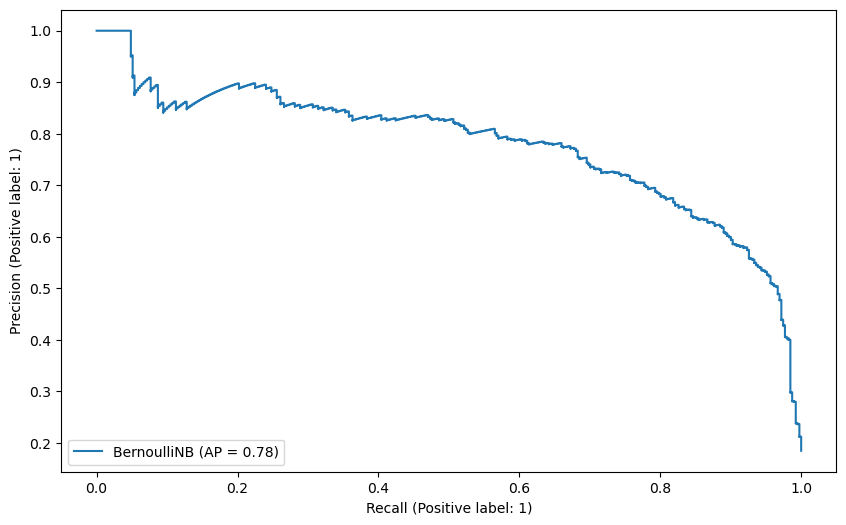

In [78]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_tf_idf,
                                      y_test)

In [79]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [80]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=SEED)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=42)

In [81]:
eval(svc, X_train_count, X_test_count)

[[1544  183]
 [  44  347]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1727
           1       0.65      0.89      0.75       391

    accuracy                           0.89      2118
   macro avg       0.81      0.89      0.84      2118
weighted avg       0.91      0.89      0.90      2118

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     15534
           1       0.71      0.94      0.81      3523

    accuracy                           0.92     19057
   macro avg       0.85      0.93      0.88     19057
weighted avg       0.94      0.92      0.92     19057



In [82]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=SEED)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [83]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.890328
train_accuracy     0.920286
test_f1            0.743417
train_f1           0.813917
test_recall        0.859490
train_recall       0.943009
test_precision     0.655191
train_precision    0.715915
dtype: float64

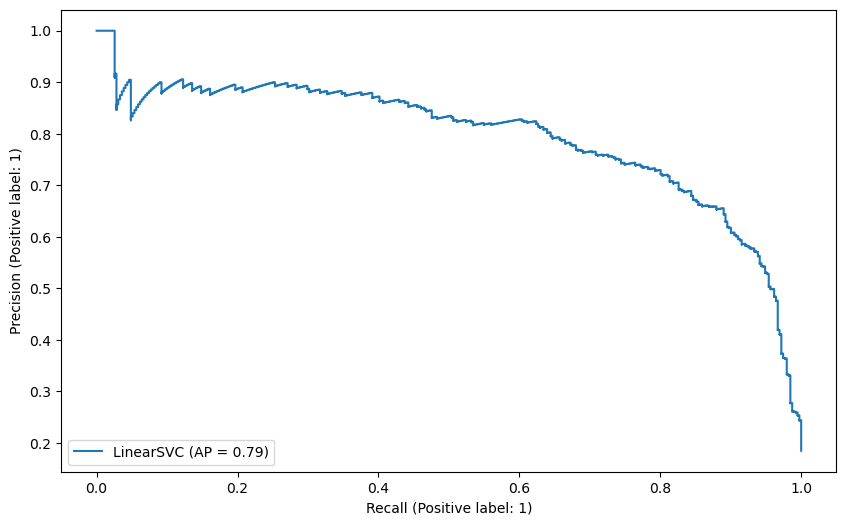

In [84]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test)

In [85]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [86]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=SEED)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=42)

In [87]:
eval(svc, X_train_tf_idf, X_test_tf_idf)

[[1496  231]
 [  37  354]]
Test_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1727
           1       0.61      0.91      0.73       391

    accuracy                           0.87      2118
   macro avg       0.79      0.89      0.82      2118
weighted avg       0.91      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     15534
           1       0.62      0.91      0.74      3523

    accuracy                           0.88     19057
   macro avg       0.80      0.89      0.83     19057
weighted avg       0.91      0.88      0.89     19057



In [88]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [89]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.868814
train_accuracy     0.879718
test_f1            0.712498
train_f1           0.737206
test_recall        0.879356
train_recall       0.912606
test_precision     0.599115
train_precision    0.618362
dtype: float64

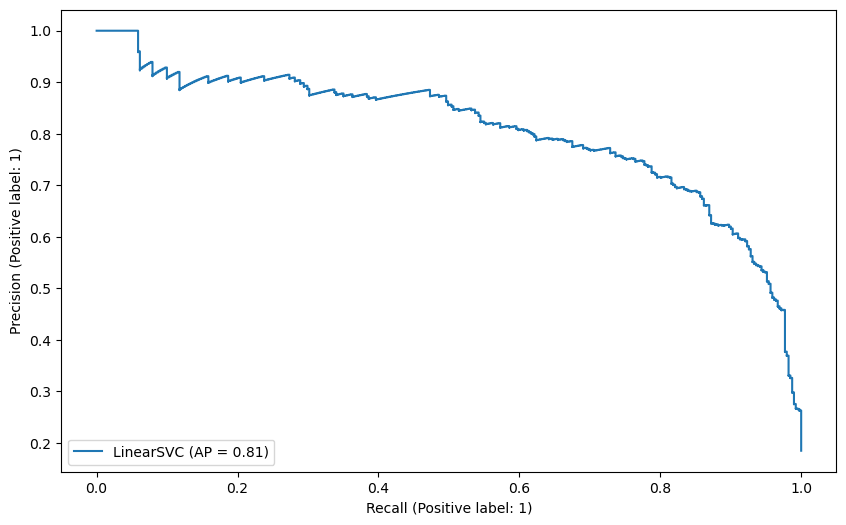

In [90]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test)

In [91]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [92]:
rf = RandomForestClassifier(200, max_depth = 7, random_state = SEED, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [93]:
eval(rf, X_train_count, X_test_count)

[[1492  235]
 [  68  323]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1727
           1       0.58      0.83      0.68       391

    accuracy                           0.86      2118
   macro avg       0.77      0.85      0.79      2118
weighted avg       0.89      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     15534
           1       0.61      0.88      0.72      3523

    accuracy                           0.88     19057
   macro avg       0.79      0.88      0.82     19057
weighted avg       0.90      0.88      0.88     19057



In [94]:
model = RandomForestClassifier(200, max_depth = 7, random_state = SEED, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [95]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.859998
train_accuracy     0.877432
test_f1            0.686686
train_f1           0.725630
test_recall        0.829682
train_recall       0.876621
test_precision     0.585969
train_precision    0.619092
dtype: float64

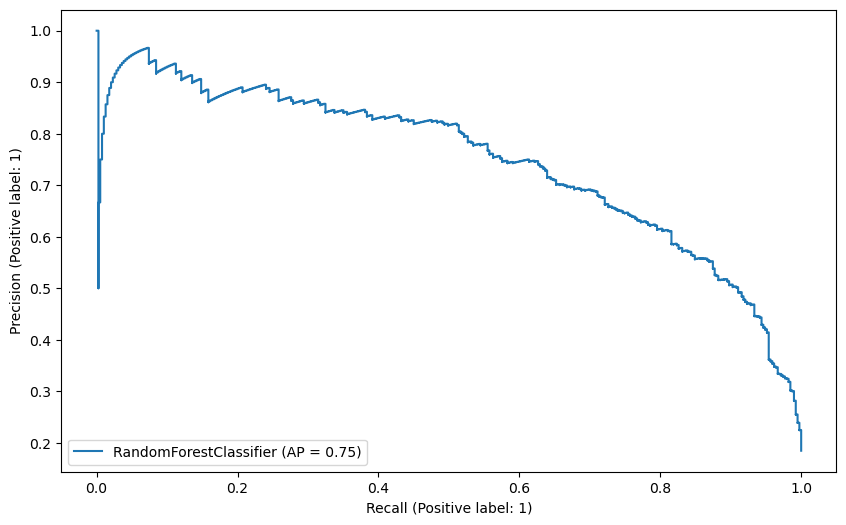

In [96]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_count,
                                      y_test)

In [97]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [98]:
rf = RandomForestClassifier(150, max_depth = 6, random_state = SEED, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [99]:
eval(rf, X_train_tf_idf, X_test_tf_idf)

[[1456  271]
 [  63  328]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1727
           1       0.55      0.84      0.66       391

    accuracy                           0.84      2118
   macro avg       0.75      0.84      0.78      2118
weighted avg       0.88      0.84      0.85      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     15534
           1       0.58      0.89      0.70      3523

    accuracy                           0.86     19057
   macro avg       0.77      0.87      0.80     19057
weighted avg       0.90      0.86      0.87     19057



In [100]:
model = RandomForestClassifier(150, max_depth = 6, random_state = SEED, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [101]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.845567
train_accuracy     0.865141
test_f1            0.665542
train_f1           0.706769
test_recall        0.830820
train_recall       0.878922
test_precision     0.555257
train_precision    0.591126
dtype: float64

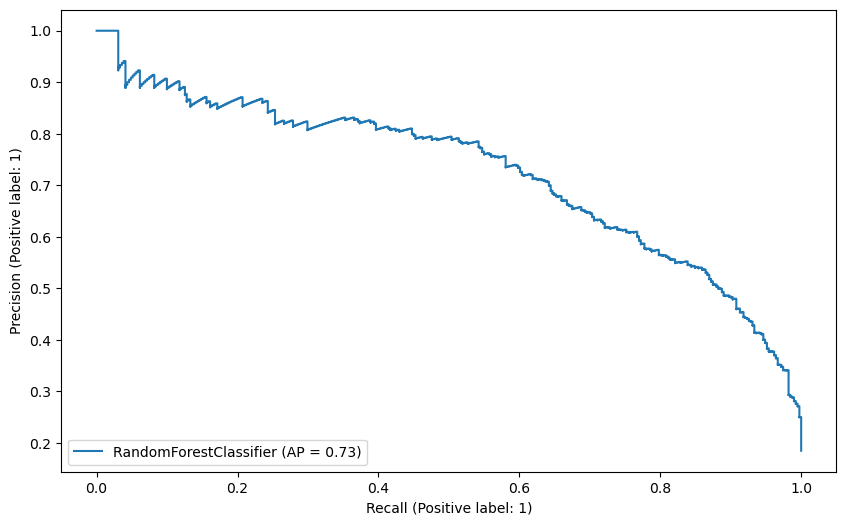

In [102]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_tf_idf,
                                      y_test)

In [103]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [104]:
ada = AdaBoostClassifier(n_estimators= 150, random_state = SEED)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [105]:
eval(ada, X_train_count, X_test_count)

[[1658   69]
 [ 152  239]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1727
           1       0.78      0.61      0.68       391

    accuracy                           0.90      2118
   macro avg       0.85      0.79      0.81      2118
weighted avg       0.89      0.90      0.89      2118

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     15534
           1       0.79      0.64      0.70      3523

    accuracy                           0.90     19057
   macro avg       0.86      0.80      0.82     19057
weighted avg       0.90      0.90      0.90     19057



In [106]:
model = AdaBoostClassifier(n_estimators= 150, random_state = SEED)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [107]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.892165
train_accuracy     0.901098
test_f1            0.676987
train_f1           0.703786
test_recall        0.611956
train_recall       0.635569
test_precision     0.758928
train_precision    0.788437
dtype: float64

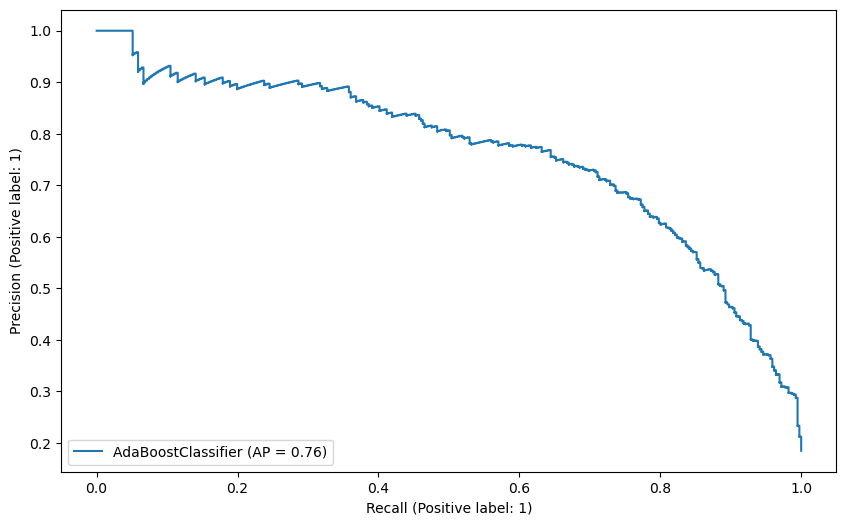

In [108]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_count,
                                      y_test)

In [109]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [110]:
ada = AdaBoostClassifier(n_estimators= 150, random_state = SEED)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [111]:
eval(ada, X_train_tf_idf, X_test_tf_idf)

[[1648   79]
 [ 142  249]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1727
           1       0.76      0.64      0.69       391

    accuracy                           0.90      2118
   macro avg       0.84      0.80      0.81      2118
weighted avg       0.89      0.90      0.89      2118

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     15534
           1       0.79      0.66      0.72      3523

    accuracy                           0.90     19057
   macro avg       0.86      0.81      0.83     19057
weighted avg       0.90      0.90      0.90     19057



In [112]:
model = AdaBoostClassifier(n_estimators= 150, random_state = SEED)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)

In [113]:
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.889332
train_accuracy     0.906567
test_f1            0.670905
train_f1           0.724979
test_recall        0.611389
train_recall       0.666162
test_precision     0.745134
train_precision    0.795227
dtype: float64

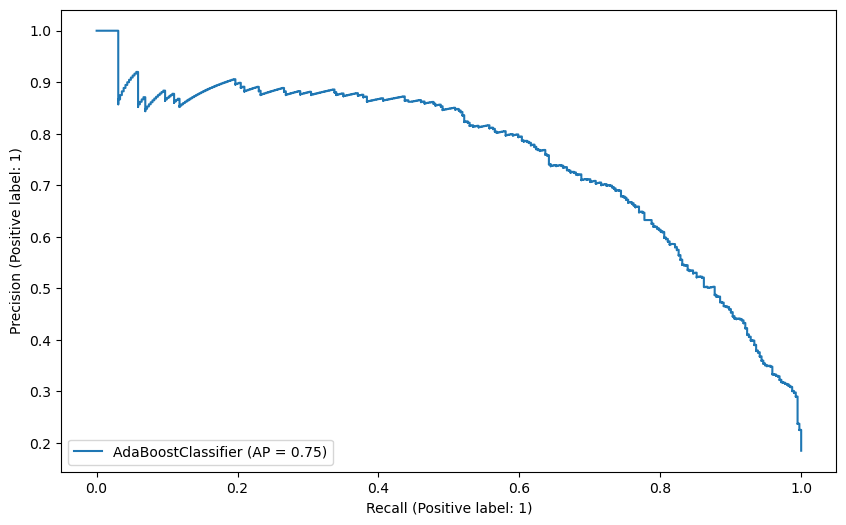

In [114]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_tf_idf,
                                      y_test)

In [115]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

### Tokenization

In [116]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words)

In [117]:
tokenizer.fit_on_texts(X)

### Creating word index

In [118]:
len(tokenizer.word_index)

14389

In [119]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


### Converting tokens to numeric

In [120]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [121]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [122]:
num_tokens.max()

116

In [123]:
num_tokens.min()

2

In [124]:
num_tokens.mean()

60.2330106257379

<Axes: ylabel='Count'>

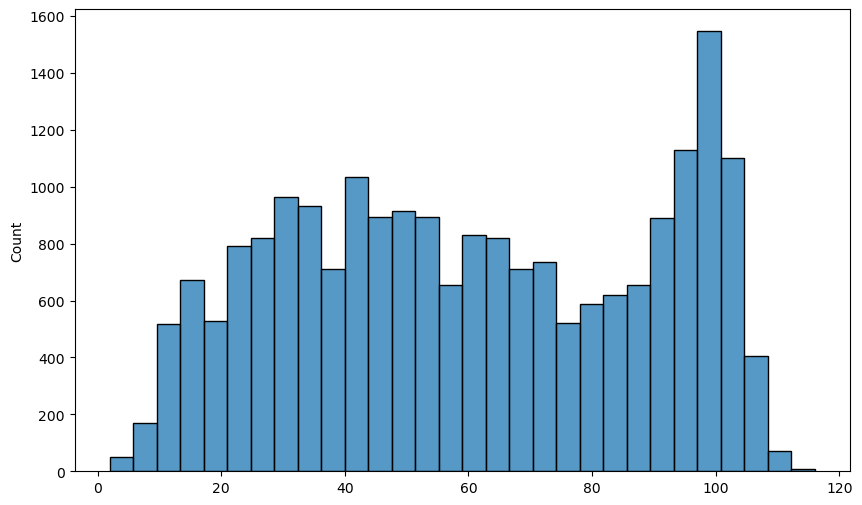

In [125]:
sns.histplot(num_tokens)

In [126]:
max_tokens = 116

In [127]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [128]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens, padding="pre")

In [129]:
X_pad.shape

(21175, 116)

### Train Set Split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.15, stratify=y, random_state=SEED)

### Modeling

In [131]:
embedding_size = 50

In [132]:
model = Sequential([Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens),
                    Dropout(0.1),

                    LSTM(units=50, return_sequences=True),
                    Dropout(0.1),
                    
                    LSTM(units=25, return_sequences=True),
                    Dropout(0.1),
                    
                    LSTM(units=12, return_sequences=False),
                    Dropout(0.1),
                    Dense(1, activation='sigmoid')])

In [133]:
optimizer = Adam(learning_rate=0.001)

In [134]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["Recall"])

In [135]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 lstm (LSTM)                 (None, 116, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 116, 25)           7600      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 lstm_2 (LSTM)               (None, 12)                1

In [136]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience = 5, restore_best_weights=True)

In [137]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [138]:
model.fit(X_train, y_train, epochs=50, batch_size=128, sample_weight=classes_weights, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
141/141 [==============================] - 9s 27ms/step - loss: 0.4685 - recall: 0.7160 - val_loss: 0.3529 - val_recall: 0.9387
Epoch 2/50
141/141 [==============================] - 3s 21ms/step - loss: 0.2575 - recall: 0.9158 - val_loss: 0.3079 - val_recall: 0.9148
Epoch 3/50
141/141 [==============================] - 3s 21ms/step - loss: 0.1929 - recall: 0.9489 - val_loss: 0.2936 - val_recall: 0.8944
Epoch 4/50
141/141 [==============================] - 3s 21ms/step - loss: 0.1481 - recall: 0.9672 - val_loss: 0.2930 - val_recall: 0.8842
Epoch 5/50
141/141 [==============================] - 3s 21ms/step - loss: 0.1171 - recall: 0.9748 - val_loss: 0.2834 - val_recall: 0.7888
Epoch 6/50
141/141 [==============================] - 3s 21ms/step - loss: 0.0893 - recall: 0.9832 - val_loss: 0.2946 - val_recall: 0.8245
Epoch 6: early stopping


### Model Evaluation

<Axes: >

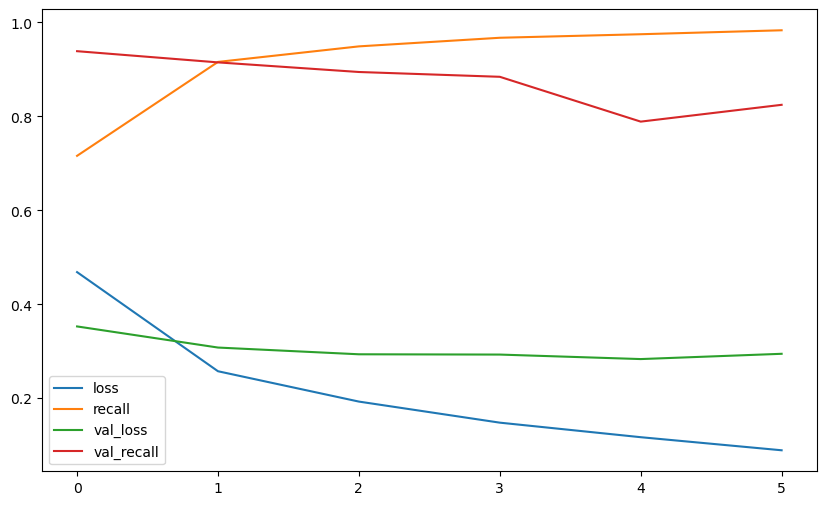

In [139]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [140]:
model_loss

loss    recall  val_loss  val_recall
0  0.468457  0.715960  0.352861    0.938671
1  0.257486  0.915840  0.307919    0.914821
2  0.192907  0.948903  0.293580    0.894378
3  0.148061  0.967238  0.292974    0.884157
4  0.117120  0.974752  0.283391    0.788756
5  0.089279  0.983168  0.294617    0.824531

In [141]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------\n")
print(classification_report(y_test, y_pred))

100/100 [==============================] - 1s 8ms/step
[[2131  459]
 [  36  551]]
-------------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      2590
           1       0.55      0.94      0.69       587

    accuracy                           0.84      3177
   macro avg       0.76      0.88      0.79      3177
weighted avg       0.90      0.84      0.86      3177



100/100 [==============================] - 1s 8ms/step


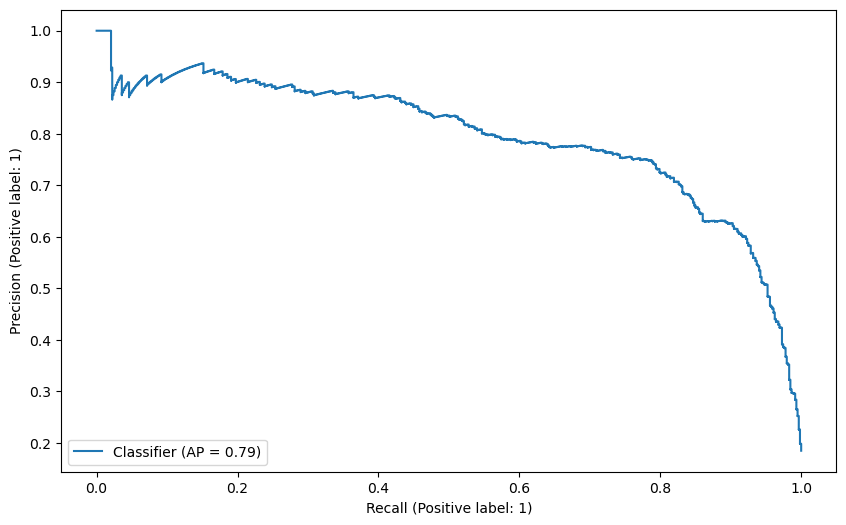

In [142]:
y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [143]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [144]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: e8cd3a02-309c-4e50-9819-4b0b3d31032a)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json


Max sentence length:  162


In [145]:
np.array(num_of_sent_tokens).mean()

76.31556080283353

In [146]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

### Train test split

In [147]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15, stratify=y, random_state=SEED)

### Tokenization

In [148]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X), max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [149]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [150]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (17998, 162)
Xmask_train.shape : (17998, 162)
Xids_test.shape   : (3177, 162)
Xmask_test.shape  : (3177, 162)


In [151]:
labels_train = y_train2.reshape(-1,1)

In [152]:
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [153]:
labels_test = y_test2.reshape(-1,1)

In [154]:
labels_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

### Transformation Matrix to Tensorflow tensor

In [155]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))

In [156]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))

In [157]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [158]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [159]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [170]:
batch_size = 16

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Creating optimization

In [169]:
epochs = 2
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr, num_train_steps=num_train_steps, num_warmup_steps=num_warmup_steps, optimizer_type='adamw')

### Creating Model

In [162]:
model = TFAutoModel.from_pretrained("bert-base-uncased")

input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

dense = Dense(100, activation='relu')(embeddings)
normalization = BatchNormalization()(dense)
dropout = Dropout(0.1)(normalization)
output = Dense(1, activation='sigmoid')(dropout)

model3 = Model(inputs=[input_ids, attention_mask], outputs=output)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 2ad8a0ff-deaa-42dd-8be0-fcbc9ef01354)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/config.json
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassi

In [163]:
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["Recall"])

In [164]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

### Model Fiting

In [165]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
Name: proportion, dtype: float64

In [166]:
weights = {0:0.18, 1:0.81}

In [171]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight=weights)

Epoch 1/2
1125/1125 [==============================] - 365s 324ms/step - loss: 0.1025 - recall: 0.8843 - val_loss: 0.3226 - val_recall: 0.9233
Epoch 2/2
1125/1125 [==============================] - 353s 314ms/step - loss: 0.0618 - recall: 0.9600 - val_loss: 0.3016 - val_recall: 0.9182


### Model evaluation

In [172]:
y_pred = model3.predict(val_ds) >= 0.5

print(confusion_matrix(y_test2, y_pred))
print("-------------------------------------------------------\n\nTest\n")
print(classification_report(y_test2, y_pred))

199/199 [==============================] - 21s 94ms/step
[[2391  199]
 [  48  539]]
-------------------------------------------------------

Test

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2590
           1       0.73      0.92      0.81       587

    accuracy                           0.92      3177
   macro avg       0.86      0.92      0.88      3177
weighted avg       0.93      0.92      0.93      3177



In [173]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(confusion_matrix(y_train2, y_train_pred))
print("-------------------------------------------------------\n\nTrain\n")
print(classification_report(y_train2, y_train_pred))

1125/1125 [==============================] - 106s 94ms/step
[[13815   856]
 [  106  3221]]
-------------------------------------------------------

Train

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     14671
           1       0.79      0.97      0.87      3327

    accuracy                           0.95     17998
   macro avg       0.89      0.95      0.92     17998
weighted avg       0.95      0.95      0.95     17998



199/199 [==============================] - 19s 95ms/step


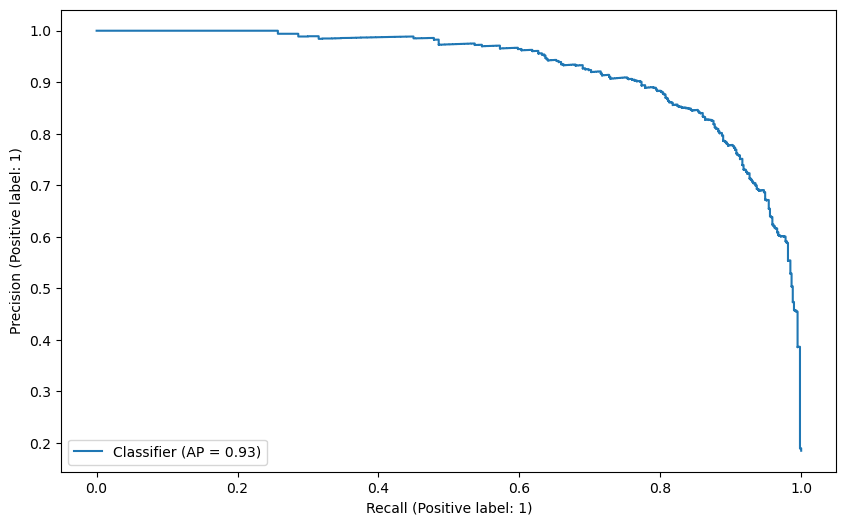

In [175]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test2, y_pred_proba)

In [176]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [293]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                                    ],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                                        ],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                                ]})

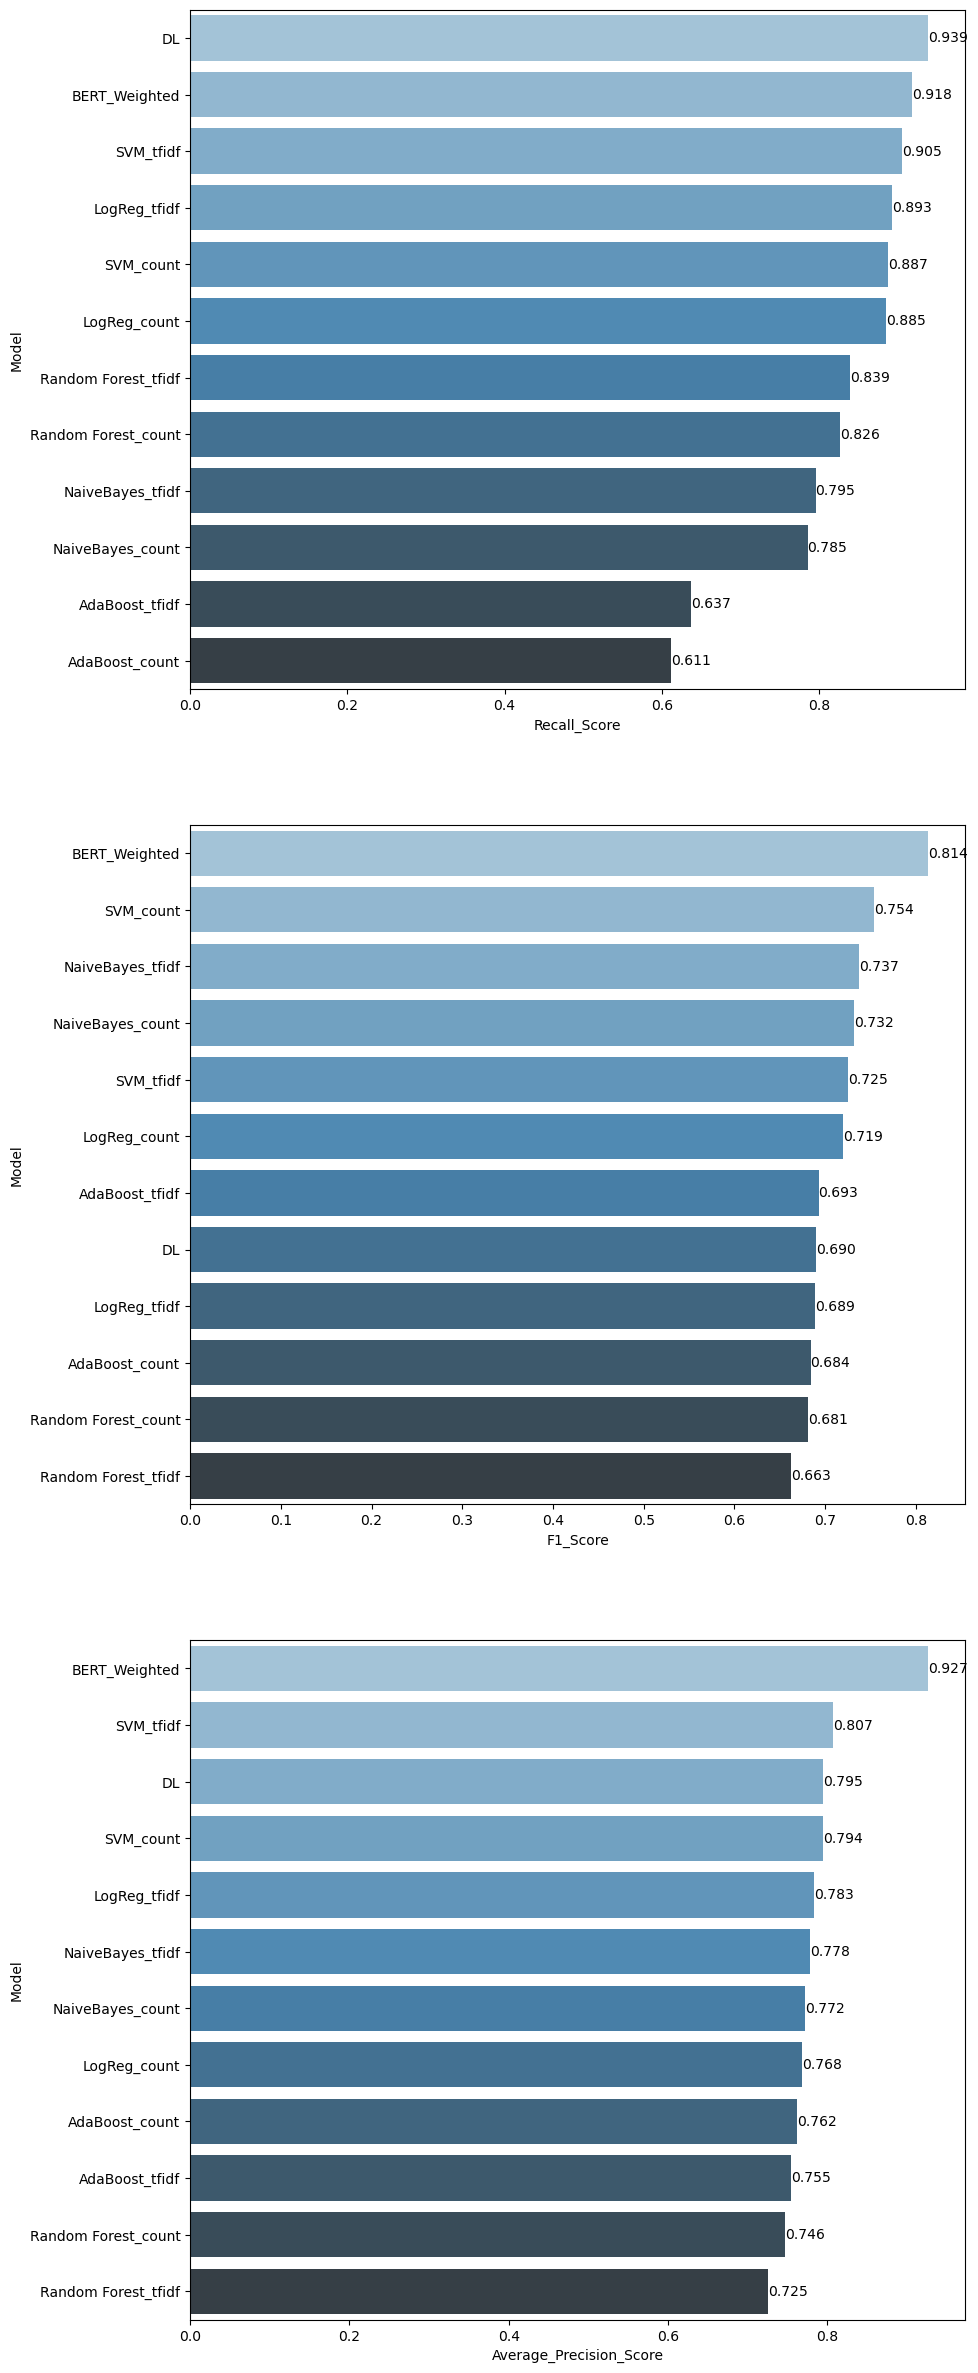

In [294]:
plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___